In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import statistics
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn


data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")


# print (data)

x0 = 1
x1 = data['sbp']
x2 = data['tobacco']
x3 = data['ldl']
x4 = data['adiposity']
x5 = data['famhist']
x6 = data['typea']
x7 = data['obesity']
x8 = data['alcohol']
x9 = data['age']

x1 = list(x1.values.reshape(-1,1))
x2 = list(x2.values.reshape(-1,1))
x3 = list(x3.values.reshape(-1,1))
x4 = list(x4.values.reshape(-1,1))
x6 = list(x6.values.reshape(-1,1))
x7 = list(x7.values.reshape(-1,1))
x8 = list(x8.values.reshape(-1,1))
x9 = list(x9.values.reshape(-1,1))      


x5_enc = pd.get_dummies(x5)

y = list(data['chd'])

In [ ]:
print (list(y))

[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

In [4]:
counter1 = 0
counter0 = 0


for i in y:
    if i == 0:
        counter0 += 1
    else:
        counter1 += 1



print (counter0/len(y))
print (counter1/len(y))

0.6536796536796536
0.3463203463203463


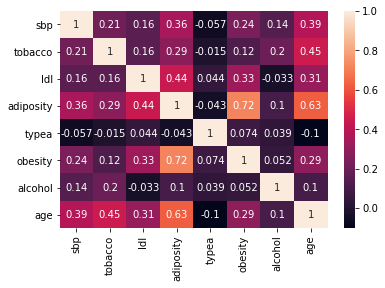

In [ ]:
df = pd.DataFrame(data,columns=['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [2]:
def mean(arr):
    a = 0

    for x in arr:
        a += float(x)
    return a//len(arr)



def standard_deviation(arr):
    avg = mean(arr)

    a = 0
    for x in arr:
        a += ((float(x) - avg)**2)
    a = a//(len(arr))
    a = math.sqrt(a)

    return a


def standardization(arr):
    x = []
    avg = mean(arr)
    std_dev = standard_deviation(arr)
    for i in arr:
        a = ((float(i)-avg)//std_dev)
        x.append(a)
    return x


x1 = list(standardization(x1))
x2 = list(standardization(x2))
x3 = list(standardization(x3))
x4 = list(standardization(x4))
x6 = list(standardization(x6))
x7 = list(standardization(x7))
x8 = list(standardization(x8))
x9 = list(standardization(x9))

In [3]:
#manipulation for one hot encoding to be able to use it as a varib
temp_arr = x5_enc['Absent']
temp_arr2 = x5_enc['Present']
new_arr = []
for i in range(len(temp_arr)):
    if temp_arr[i] == 0:
        new_arr.append(1)
    else:
        new_arr.append(2)

print (new_arr)
x5 = new_arr



[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 

In [4]:
#Hypothesis Model 
def hypothesis(px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,pw0,pw1,pw2,pw3,pw4,pw5,pw6,pw7,pw8,pw9,num):
    z = pw0*px0 + pw1*px1[num] + pw2*px2[num] + pw3*px3[num] + pw4*px4[num] + pw5*px5[num] + pw6*px6[num] + pw7*px7[num] + pw8*px8[num] + pw9*px9[num] 

    hypo = 1/(1+np.exp(-z))
    return hypo


# cost function
def cost(px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,pw0,pw1,pw2,pw3,pw4,pw5,pw6,pw7,pw8,pw9,py):
    cst = 0
    for i in range(len(px1)):
        cst += (y[i]*math.log(hypothesis(px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,pw0,pw1,pw2,pw3,pw4,pw5,pw6,pw7,pw8,pw9,i))   + (1-y[i])*math.log(1- hypothesis(px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,pw0,pw1,pw2,pw3,pw4,pw5,pw6,pw7,pw8,pw9,i))      )

    return -cst/len(px1)

#batch gradient descent
def Wnew(px,y,W_old, alp, j):
    summ = 0
    for i in range(len(x1)):
        if j == 0:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*1
        if j == 1:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x1[i]
        if j == 2:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x2[i]
        if j == 3:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x3[i]
        if j == 4:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x4[i]
        if j == 5:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x5[i]
        if j == 6:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x6[i]
        if j == 7:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x7[i]
        if j == 8:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x8[i]
        if j == 9:
            summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x9[i]
    
    var = W_old + (alp/len(x1))*(summ)
    return var


In [5]:
random.seed(1)
w0 = random.random()
w1 = random.random()
w2 = random.random()
w3 = random.random()
w4 = random.random()
w5 = random.random()
w6 = random.random()
w7 = random.random()
w8 = random.random()
w9 = random.random()

In [6]:
cost_arr = []

alpha = 0.0001

counterw = 500

while (counterw > 0):
    w0 = Wnew(x0,y,w0, alpha, 0)
    w1 = Wnew(x1,y,w1, alpha, 1)
    w2 = Wnew(x2,y,w2, alpha, 2)
    w3 = Wnew(x3,y,w3, alpha, 3)
    w4 = Wnew(x4,y,w4, alpha, 4)
    w5 = Wnew(x5,y,w5, alpha, 5)
    w6 = Wnew(x6,y,w6, alpha, 6)
    w7 = Wnew(x7,y,w7, alpha, 7)
    w8 = Wnew(x8,y,w8, alpha, 8)
    w9 = Wnew(x9,y,w9, alpha, 9)
    cost_arr.append(cost(1,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    counterw -= 1


print (len(cost_arr))

500


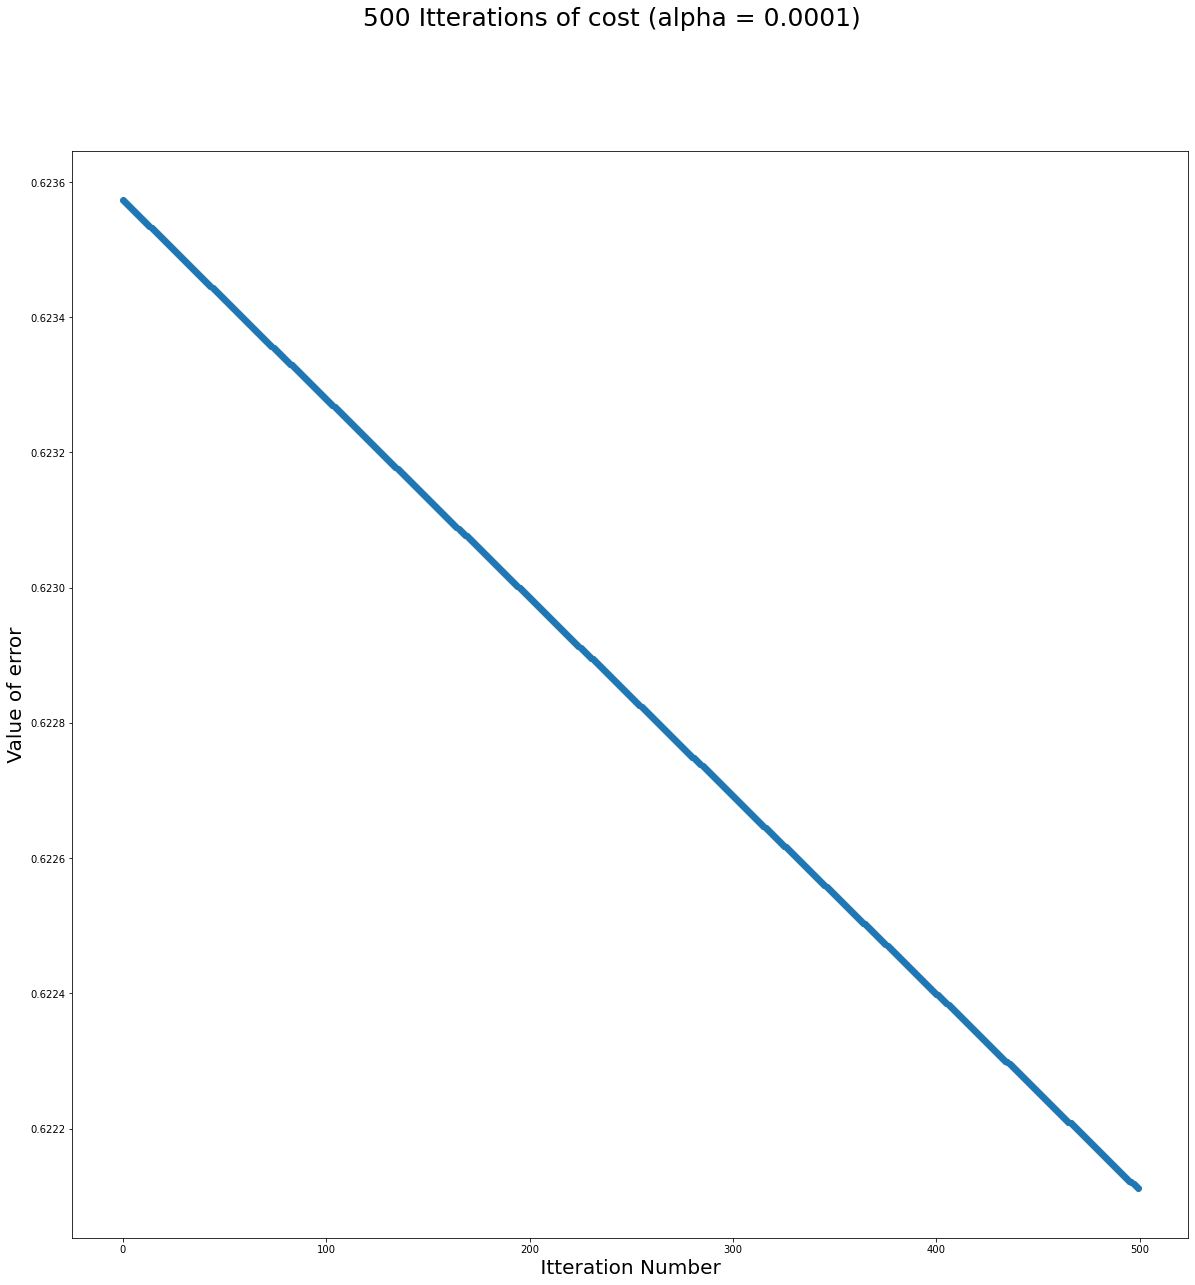

In [ ]:
x_axis = [x for x in range(0,500)]

fig1 = plt.figure(1, figsize=(20,20))
fig1.suptitle(" 500 Itterations of cost (alpha = 0.0001) ", fontsize=25)
chart1 = fig1.add_subplot()
chart1.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.0001

counterw = 1000

while (counterw > 0):
    w0 = Wnew(x0,y,w0, alpha, 0)
    w1 = Wnew(x1,y,w1, alpha, 1)
    w2 = Wnew(x2,y,w2, alpha, 2)
    w3 = Wnew(x3,y,w3, alpha, 3)
    w4 = Wnew(x4,y,w4, alpha, 4)
    w5 = Wnew(x5,y,w5, alpha, 5)
    w6 = Wnew(x6,y,w6, alpha, 6)
    w7 = Wnew(x7,y,w7, alpha, 7)
    w8 = Wnew(x8,y,w8, alpha, 8)
    w9 = Wnew(x9,y,w9, alpha, 9)
    cost_arr.append(cost(1,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    counterw -= 1


print (len(cost_arr))

1000


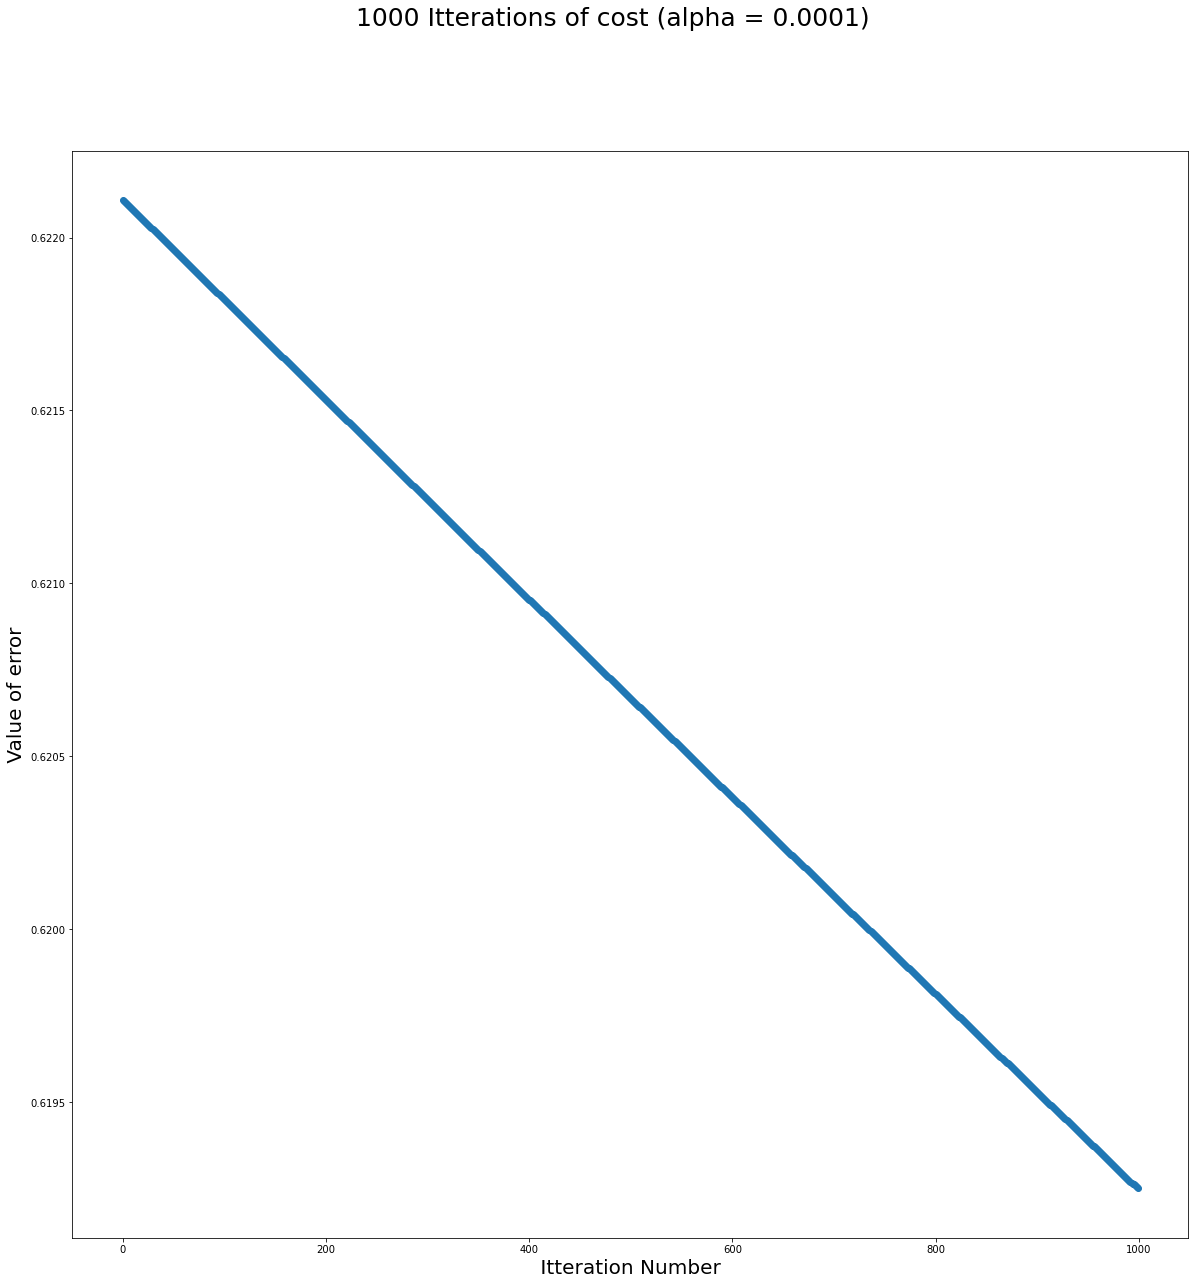

In [ ]:
x_axis = [x for x in range(0,1000)]

fig2 = plt.figure(2, figsize=(20,20))
fig2.suptitle(" 1000 Itterations of cost (alpha = 0.0001) ", fontsize=25)
chart2 = fig2.add_subplot()
chart2.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.0001

counterw = 10000

while (counterw > 0):
    w0 = Wnew(x0,y,w0, alpha, 0)
    w1 = Wnew(x1,y,w1, alpha, 1)
    w2 = Wnew(x2,y,w2, alpha, 2)
    w3 = Wnew(x3,y,w3, alpha, 3)
    w4 = Wnew(x4,y,w4, alpha, 4)
    w5 = Wnew(x5,y,w5, alpha, 5)
    w6 = Wnew(x6,y,w6, alpha, 6)
    w7 = Wnew(x7,y,w7, alpha, 7)
    w8 = Wnew(x8,y,w8, alpha, 8)
    w9 = Wnew(x9,y,w9, alpha, 9)
    cost_arr.append(cost(1,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    counterw -= 1


print (len(cost_arr))

10000


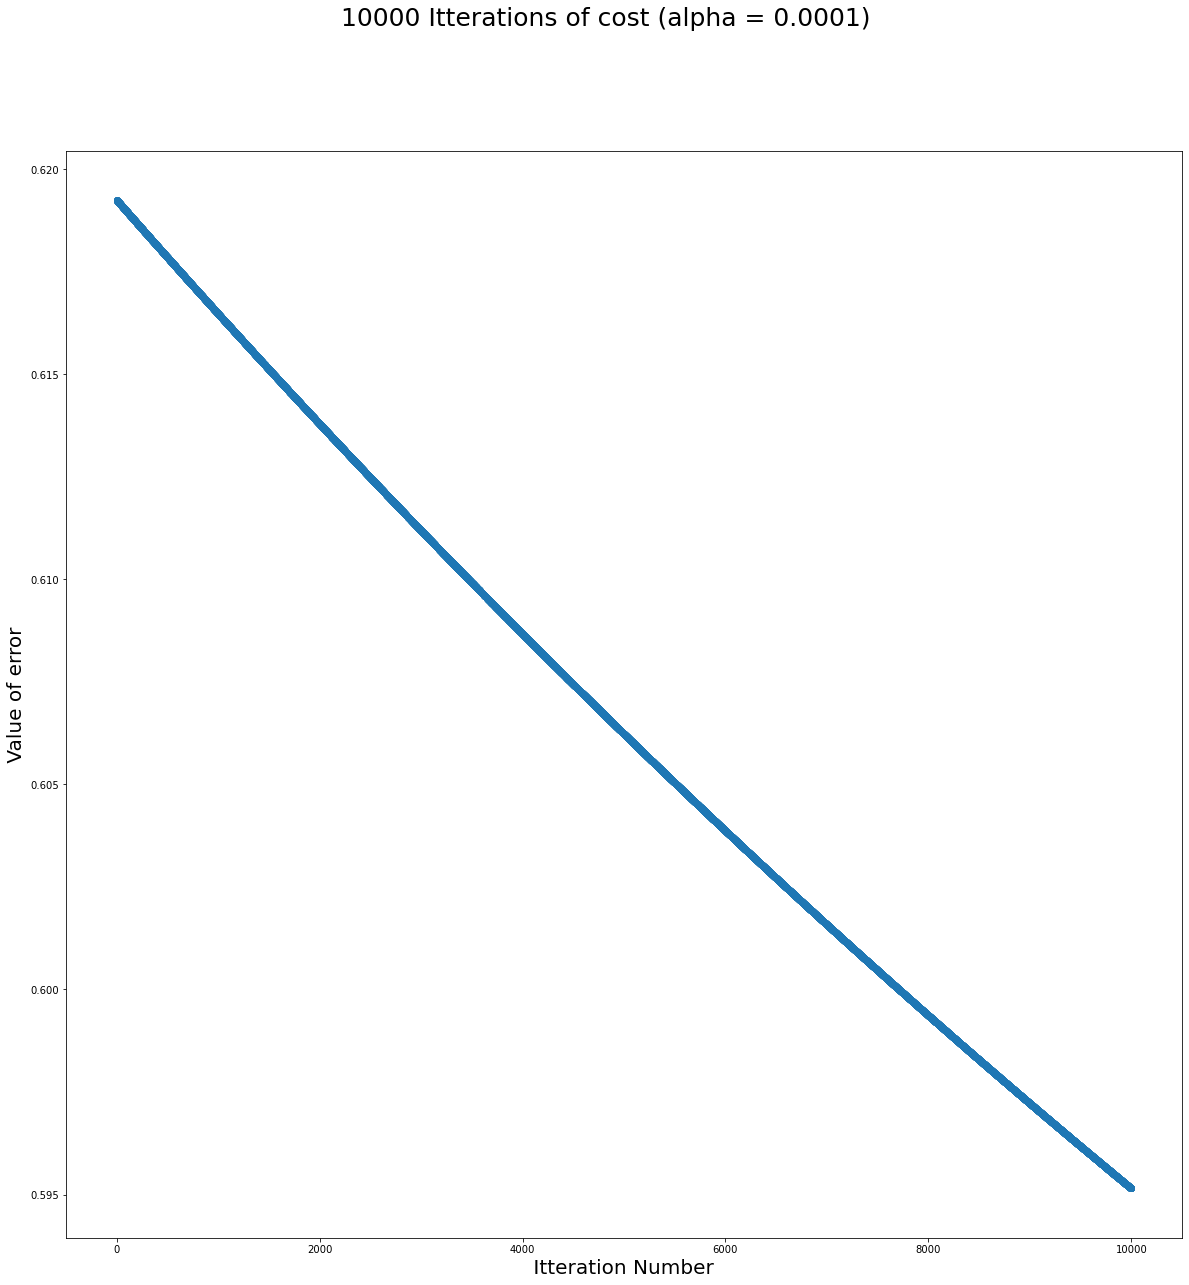

In [ ]:
x_axis = [x for x in range(0,10000)]

fig3 = plt.figure(3, figsize=(20,20))
fig3.suptitle(" 10000 Itterations of cost (alpha = 0.0001) ", fontsize=25)
chart3 = fig3.add_subplot()
chart3.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.001

counterw = 500

while (counterw > 0):
    w0 = Wnew(x0,y,w0, alpha, 0)
    w1 = Wnew(x1,y,w1, alpha, 1)
    w2 = Wnew(x2,y,w2, alpha, 2)
    w3 = Wnew(x3,y,w3, alpha, 3)
    w4 = Wnew(x4,y,w4, alpha, 4)
    w5 = Wnew(x5,y,w5, alpha, 5)
    w6 = Wnew(x6,y,w6, alpha, 6)
    w7 = Wnew(x7,y,w7, alpha, 7)
    w8 = Wnew(x8,y,w8, alpha, 8)
    w9 = Wnew(x9,y,w9, alpha, 9)
    cost_arr.append(cost(1,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    counterw -= 1


print (len(cost_arr))

500


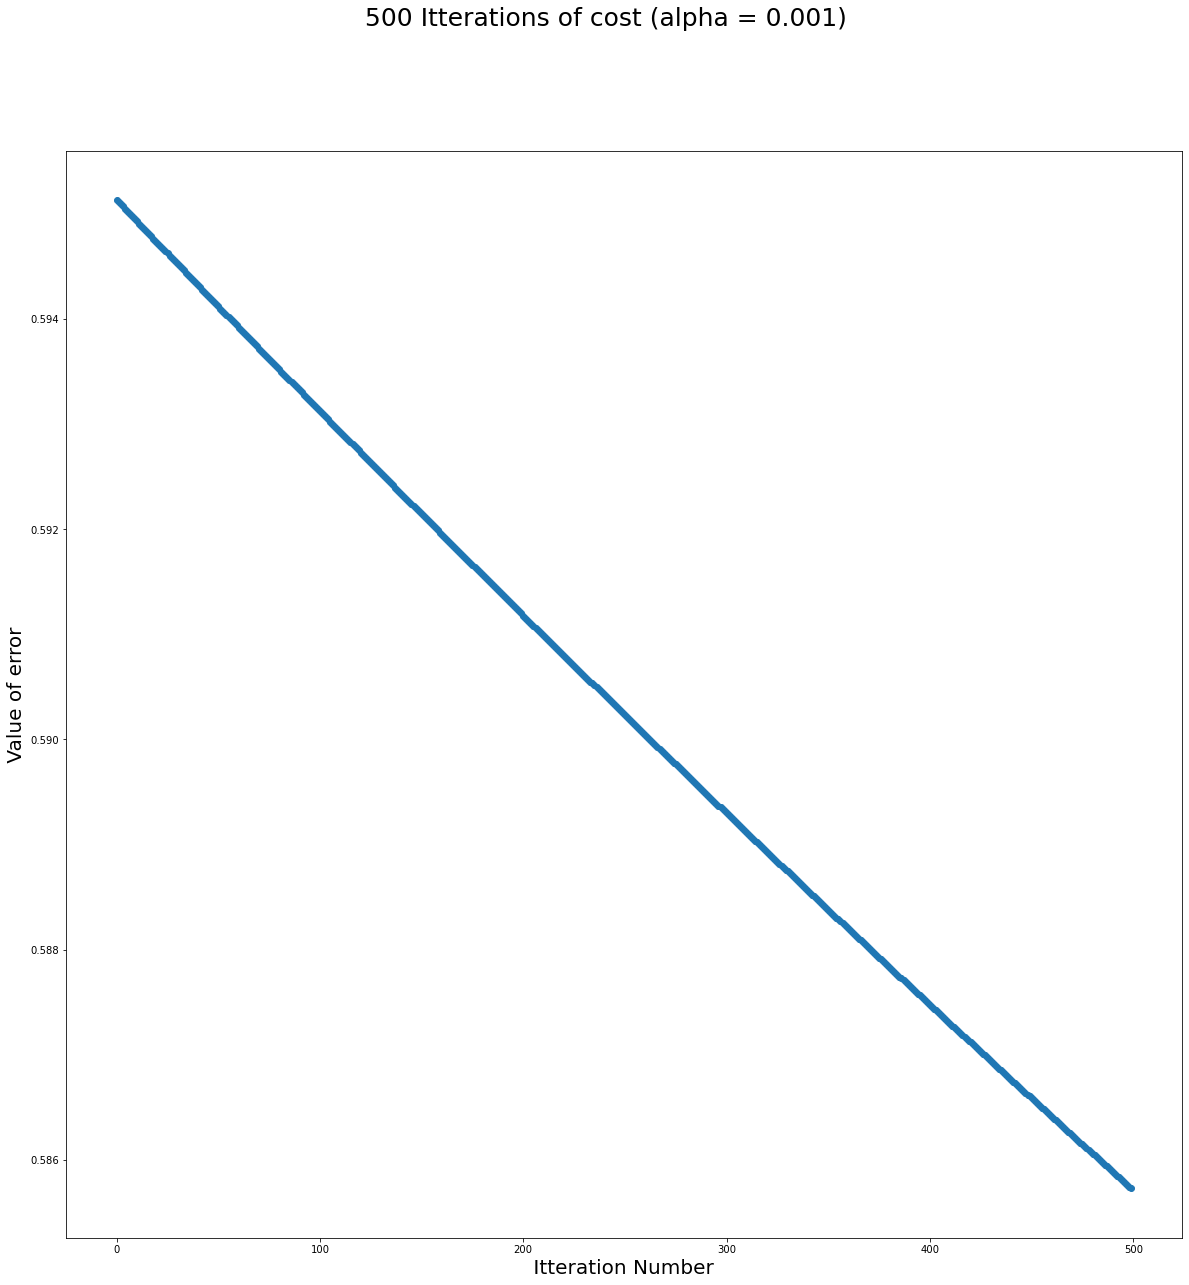

In [ ]:
x_axis = [x for x in range(0,500)]

fig4 = plt.figure(4, figsize=(20,20))
fig4.suptitle(" 500 Itterations of cost (alpha = 0.001) ", fontsize=25)
chart4 = fig4.add_subplot()
chart4.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.001

counterw = 1000

while (counterw > 0):
    w0 = Wnew(x0,y,w0, alpha, 0)
    w1 = Wnew(x1,y,w1, alpha, 1)
    w2 = Wnew(x2,y,w2, alpha, 2)
    w3 = Wnew(x3,y,w3, alpha, 3)
    w4 = Wnew(x4,y,w4, alpha, 4)
    w5 = Wnew(x5,y,w5, alpha, 5)
    w6 = Wnew(x6,y,w6, alpha, 6)
    w7 = Wnew(x7,y,w7, alpha, 7)
    w8 = Wnew(x8,y,w8, alpha, 8)
    w9 = Wnew(x9,y,w9, alpha, 9)
    cost_arr.append(cost(1,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    counterw -= 1


print (len(cost_arr))

1000


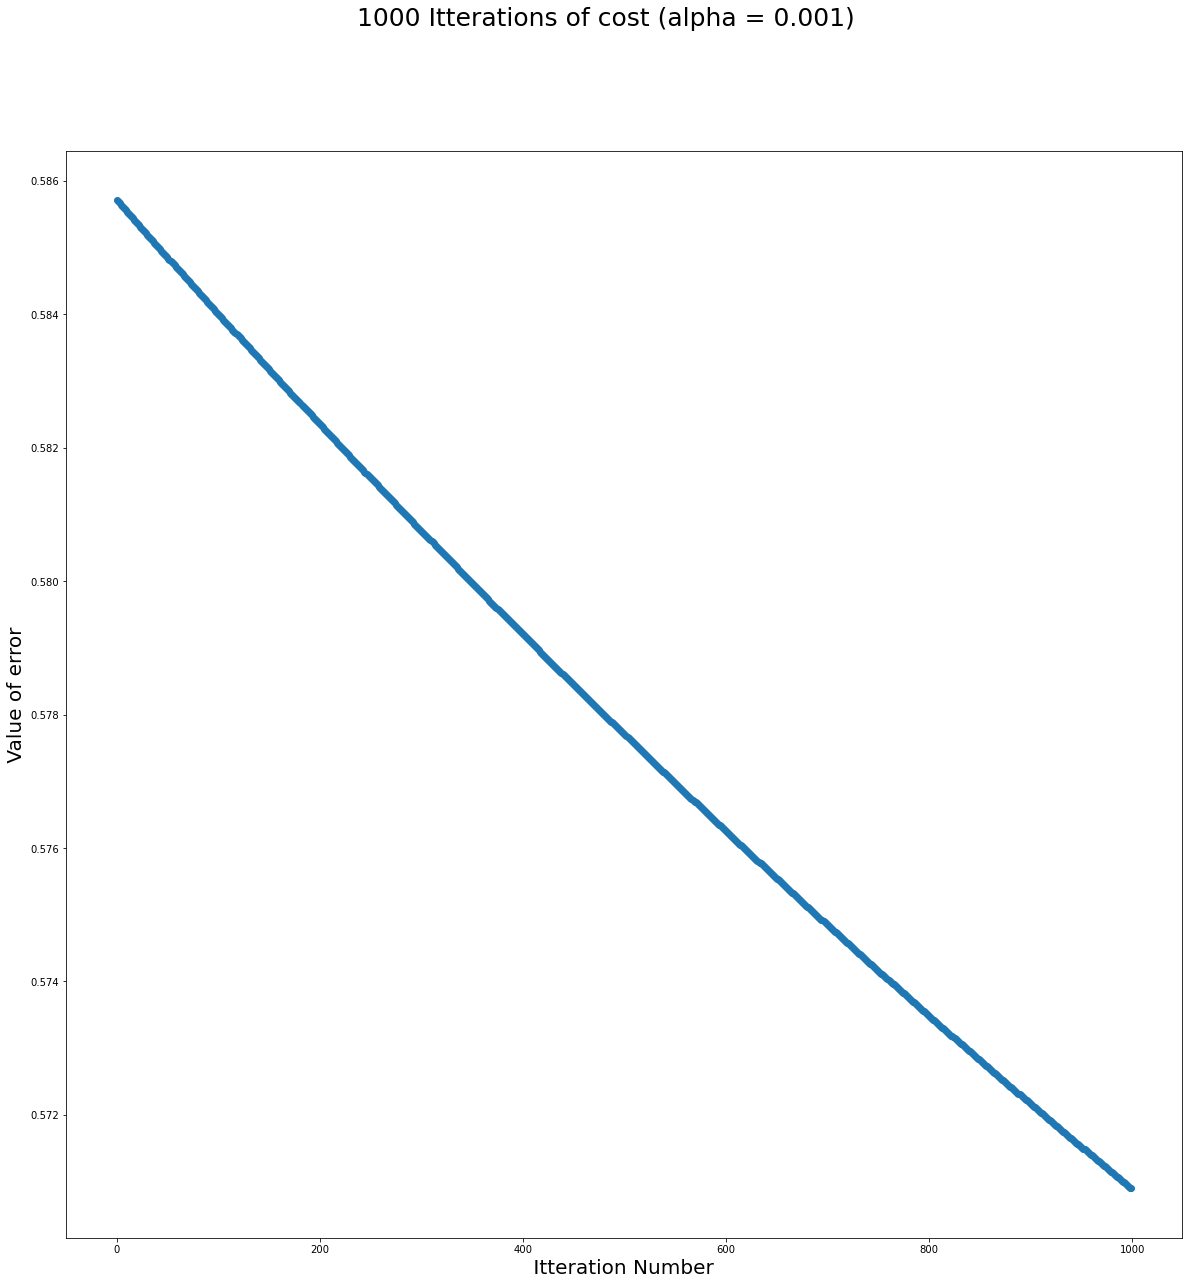

In [ ]:
x_axis = [x for x in range(0,1000)]

fig5 = plt.figure(5, figsize=(20,20))
fig5.suptitle(" 1000 Itterations of cost (alpha = 0.001) ", fontsize=25)
chart5 = fig5.add_subplot()
chart5.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.001

counterw = 10000

while (counterw > 0):
    w0 = Wnew(x0,y,w0, alpha, 0)
    w1 = Wnew(x1,y,w1, alpha, 1)
    w2 = Wnew(x2,y,w2, alpha, 2)
    w3 = Wnew(x3,y,w3, alpha, 3)
    w4 = Wnew(x4,y,w4, alpha, 4)
    w5 = Wnew(x5,y,w5, alpha, 5)
    w6 = Wnew(x6,y,w6, alpha, 6)
    w7 = Wnew(x7,y,w7, alpha, 7)
    w8 = Wnew(x8,y,w8, alpha, 8)
    w9 = Wnew(x9,y,w9, alpha, 9)
    cost_arr.append(cost(1,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    counterw -= 1


print (len(cost_arr))

10000


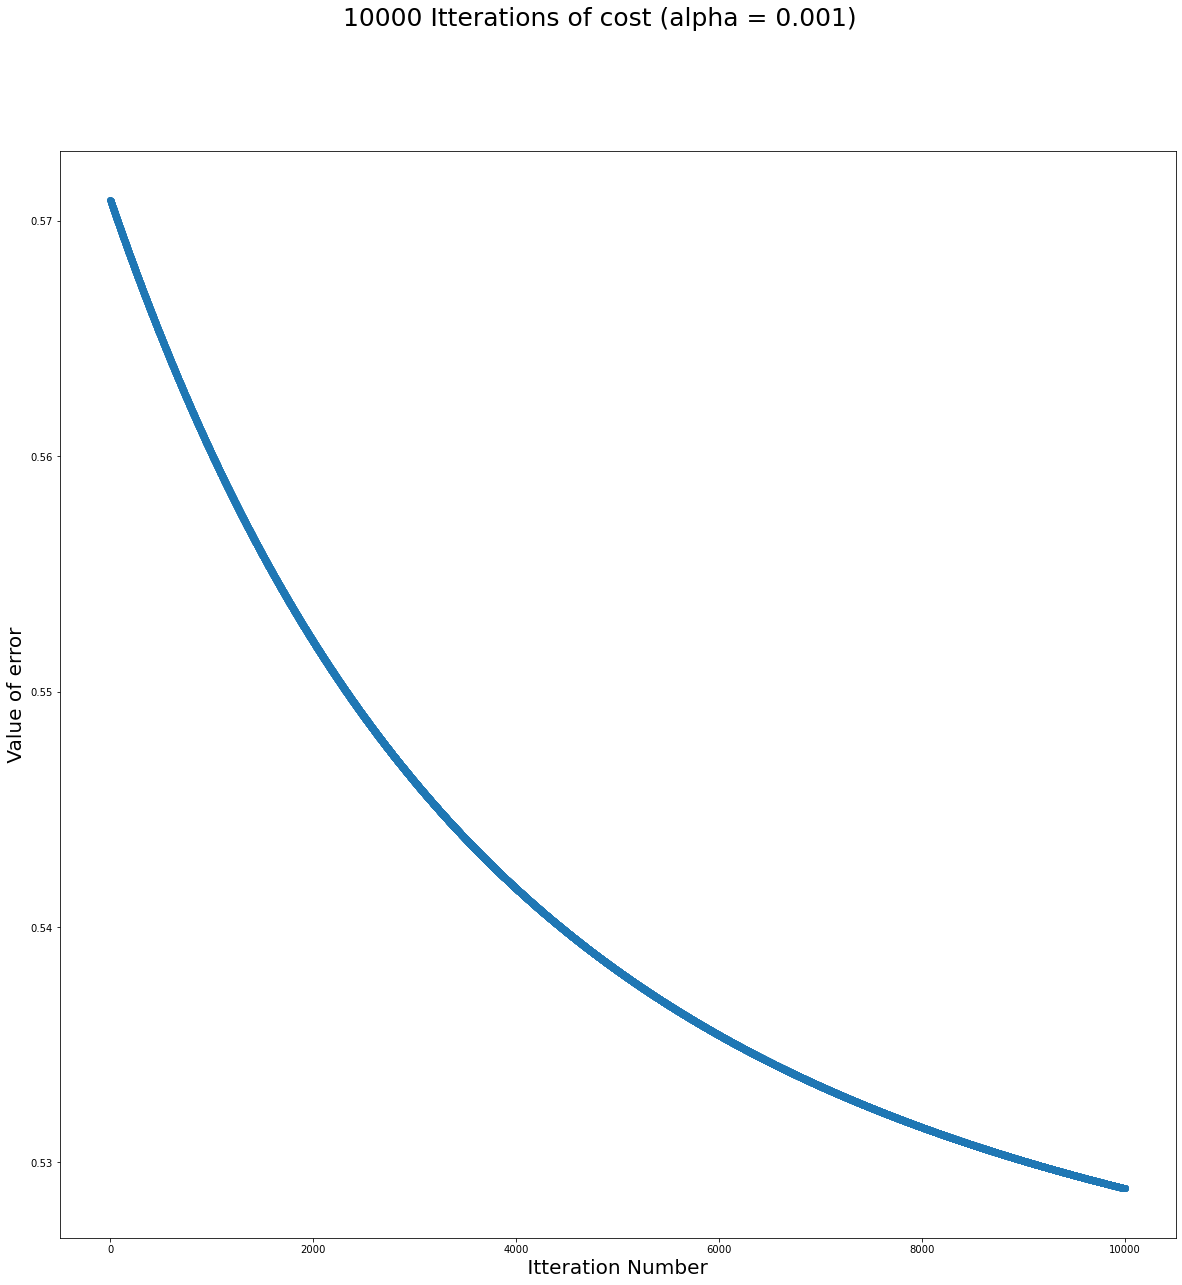

In [ ]:
x_axis = [x for x in range(0,10000)]

fig6 = plt.figure(6, figsize=(20,20))
fig6.suptitle(" 10000 Itterations of cost (alpha = 0.001) ", fontsize=25)
chart6 = fig6.add_subplot()
chart6.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:

# del data['famhist']
print(data)

     row.names  sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0            1  160    12.00   5.73      23.11     49    25.30    97.20   52   
1            2  144     0.01   4.41      28.61     55    28.87     2.06   63   
2            3  118     0.08   3.48      32.28     52    29.14     3.81   46   
3            4  170     7.50   6.41      38.03     51    31.99    24.26   58   
4            5  134    13.60   3.50      27.78     60    25.99    57.34   49   
..         ...  ...      ...    ...        ...    ...      ...      ...  ...   
457        459  214     0.40   5.98      31.72     64    28.45     0.00   58   
458        460  182     4.20   4.41      32.10     52    28.61    18.72   52   
459        461  108     3.00   1.59      15.23     40    20.09    26.64   55   
460        462  118     5.40  11.61      30.79     64    27.35    23.97   40   
461        463  132     0.00   4.82      33.41     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

my_pre = []

# del data['famhist']
x_ = pd.DataFrame(data.iloc[:,:-1])
y_ = pd.DataFrame(data.iloc[:,-1])

# x_ = np.array(x_)
# y_ = np.array(y_)

# x_ = x_.reshape(-1,1)
# y_ = y_.reshape(-1,1)


# X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
logmodel = LogisticRegression(solver='lbfgs', max_iter=20000)
logmodel.fit(x_,y_)
predictions = logmodel.predict(x_)
print(predictions)

for i in range(len(x1)):
    if hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i) < 0.5:
        my_pre.append(0)
    else:
        my_pre.append(1)
print(my_pre)


[1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0

In [ ]:
bi_pre = list(predictions)
c_BI = 0
c_my = 0
actual_y = list(y)

for i in range(len(y)):
    if my_pre[i] == actual_y[i]:
        c_my += 1
    if bi_pre[i] == actual_y[i]:
        c_BI += 1
print (c_BI/len(y))
print (c_my/len(y))


0.7272727272727273
0.7121212121212122


In [7]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

x0  = 1
x1_batch = list(chunks(x1,50))
x2_batch = list(chunks(x2,50))
x3_batch = list(chunks(x3,50))
x4_batch = list(chunks(x4,50))
x5_batch = list(chunks(x5,50))
x6_batch = list(chunks(x6,50))
x7_batch = list(chunks(x7,50))
x8_batch = list(chunks(x8,50))
x9_batch = list(chunks(x9,50))

y_batch = list(chunks(y,50))

print (x1_batch[1][1])

-1.0


In [8]:
random.seed(1)
w0 = random.random()
w1 = random.random()
w2 = random.random()
w3 = random.random()
w4 = random.random()
w5 = random.random()
w6 = random.random()
w7 = random.random()
w8 = random.random()
w9 = random.random()

print (w1)

0.8474337369372327


In [ ]:
# def Wnew(px,y,W_old, alp, j):
#     summ = 0
#     for i in range(len(x1)):
#         if j == 0:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*1
#         if j == 1:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x1[i]
#         if j == 2:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x2[i]
#         if j == 3:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x3[i]
#         if j == 4:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x4[i]
#         if j == 5:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x5[i]
#         if j == 6:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x6[i]
#         if j == 7:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x7[i]
#         if j == 8:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x8[i]
#         if j == 9:
#             summ += (y[i] - hypothesis(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x9[i]
    
#     var = W_old + (alp/len(x1))*(summ)
#     return var


In [9]:
def hypothesis(px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,pw0,pw1,pw2,pw3,pw4,pw5,pw6,pw7,pw8,pw9,num):
    z = pw0*px0 + pw1*px1[num] + pw2*px2[num] + pw3*px3[num] + pw4*px4[num] + pw5*px5[num] + pw6*px6[num] + pw7*px7[num] + pw8*px8[num] + pw9*px9[num] 

    hypo = 1/(1+np.exp(-z))
    return hypo

def Wnew(px,yb,W_old, alp, el, j):
    summ = 0  
    for i in range(len(yb)):
        if j == 0:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*1
        if j == 1:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x1[i]
        if j == 2:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x2[i]
        if j == 3:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x3[i]
        if j == 4:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x4[i]
        if j == 5:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x5[i]
        if j == 6:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x6[i]
        if j == 7:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x7[i]
        if j == 8:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x8[i]
        if j == 9:
            summ += (yb[i] - hypothesis(1,x1_batch[el],x2_batch[el],x3_batch[el],x4_batch[el],x5_batch[el],x6_batch[el],x7_batch[el],x8_batch[el],x9_batch[el],w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,i))*x9[i]
    
    var = W_old + (alp/len(x1))*(summ)
    return var

In [13]:
cost_arr = []

alpha = 0.0001

counterw = 500
counterb = 0

while (counterw > 0):
    while (counterb < 10):
        w0 = Wnew(1,y_batch[counterb],w0, alpha, counterb, 0)
        w1 = Wnew(x1_batch[counterb],y_batch[counterb],w1, alpha, counterb, 1)
        w2 = Wnew(x2_batch[counterb],y_batch[counterb],w2, alpha, counterb, 2)
        w3 = Wnew(x3_batch[counterb],y_batch[counterb],w3, alpha, counterb, 3)
        w4 = Wnew(x4_batch[counterb],y_batch[counterb],w4, alpha, counterb, 4)
        w5 = Wnew(x5_batch[counterb],y_batch[counterb],w5, alpha, counterb, 5)
        w6 = Wnew(x6_batch[counterb],y_batch[counterb],w6, alpha, counterb, 6)
        w7 = Wnew(x7_batch[counterb],y_batch[counterb],w7, alpha, counterb, 7)
        w8 = Wnew(x8_batch[counterb],y_batch[counterb],w8, alpha, counterb, 8)
        w9 = Wnew(x9_batch[counterb],y_batch[counterb],w9, alpha, counterb, 9)
        counterb += 1
    cost_arr.append(cost(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    if counterb == 10:
      counterb = 0
    counterw -= 1


print (len(cost_arr))

500


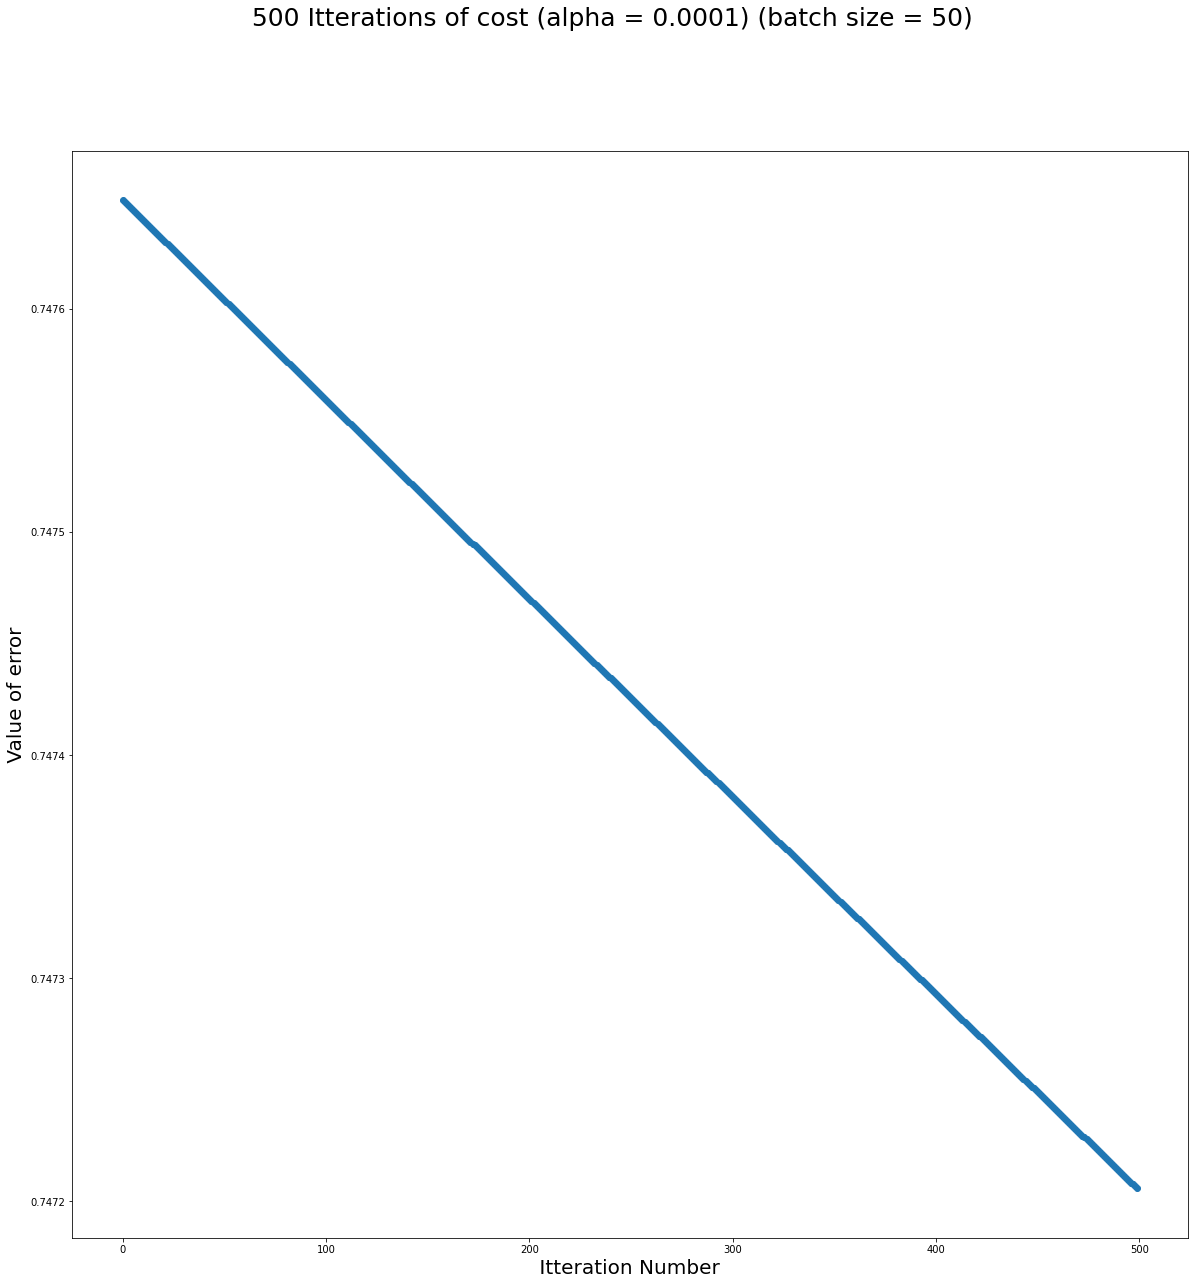

In [14]:
x_axis = [x for x in range(0,500)]

fig7 = plt.figure(7, figsize=(20,20))
fig7.suptitle(" 500 Itterations of cost (alpha = 0.0001) (batch size = 50) ", fontsize=25)
chart7 = fig7.add_subplot()
chart7.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [17]:
cost_arr = []

alpha = 0.0001

counterw = 1000
counterb = 0

while (counterw > 0):
    while (counterb < 10):
        w0 = Wnew(1,y_batch[counterb],w0, alpha, counterb, 0)
        w1 = Wnew(x1_batch[counterb],y_batch[counterb],w1, alpha, counterb, 1)
        w2 = Wnew(x2_batch[counterb],y_batch[counterb],w2, alpha, counterb, 2)
        w3 = Wnew(x3_batch[counterb],y_batch[counterb],w3, alpha, counterb, 3)
        w4 = Wnew(x4_batch[counterb],y_batch[counterb],w4, alpha, counterb, 4)
        w5 = Wnew(x5_batch[counterb],y_batch[counterb],w5, alpha, counterb, 5)
        w6 = Wnew(x6_batch[counterb],y_batch[counterb],w6, alpha, counterb, 6)
        w7 = Wnew(x7_batch[counterb],y_batch[counterb],w7, alpha, counterb, 7)
        w8 = Wnew(x8_batch[counterb],y_batch[counterb],w8, alpha, counterb, 8)
        w9 = Wnew(x9_batch[counterb],y_batch[counterb],w9, alpha, counterb, 9)
        counterb += 1
    cost_arr.append(cost(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    if counterb == 10:
        counterb = 0
    counterw -= 1


print (len(cost_arr))

1000


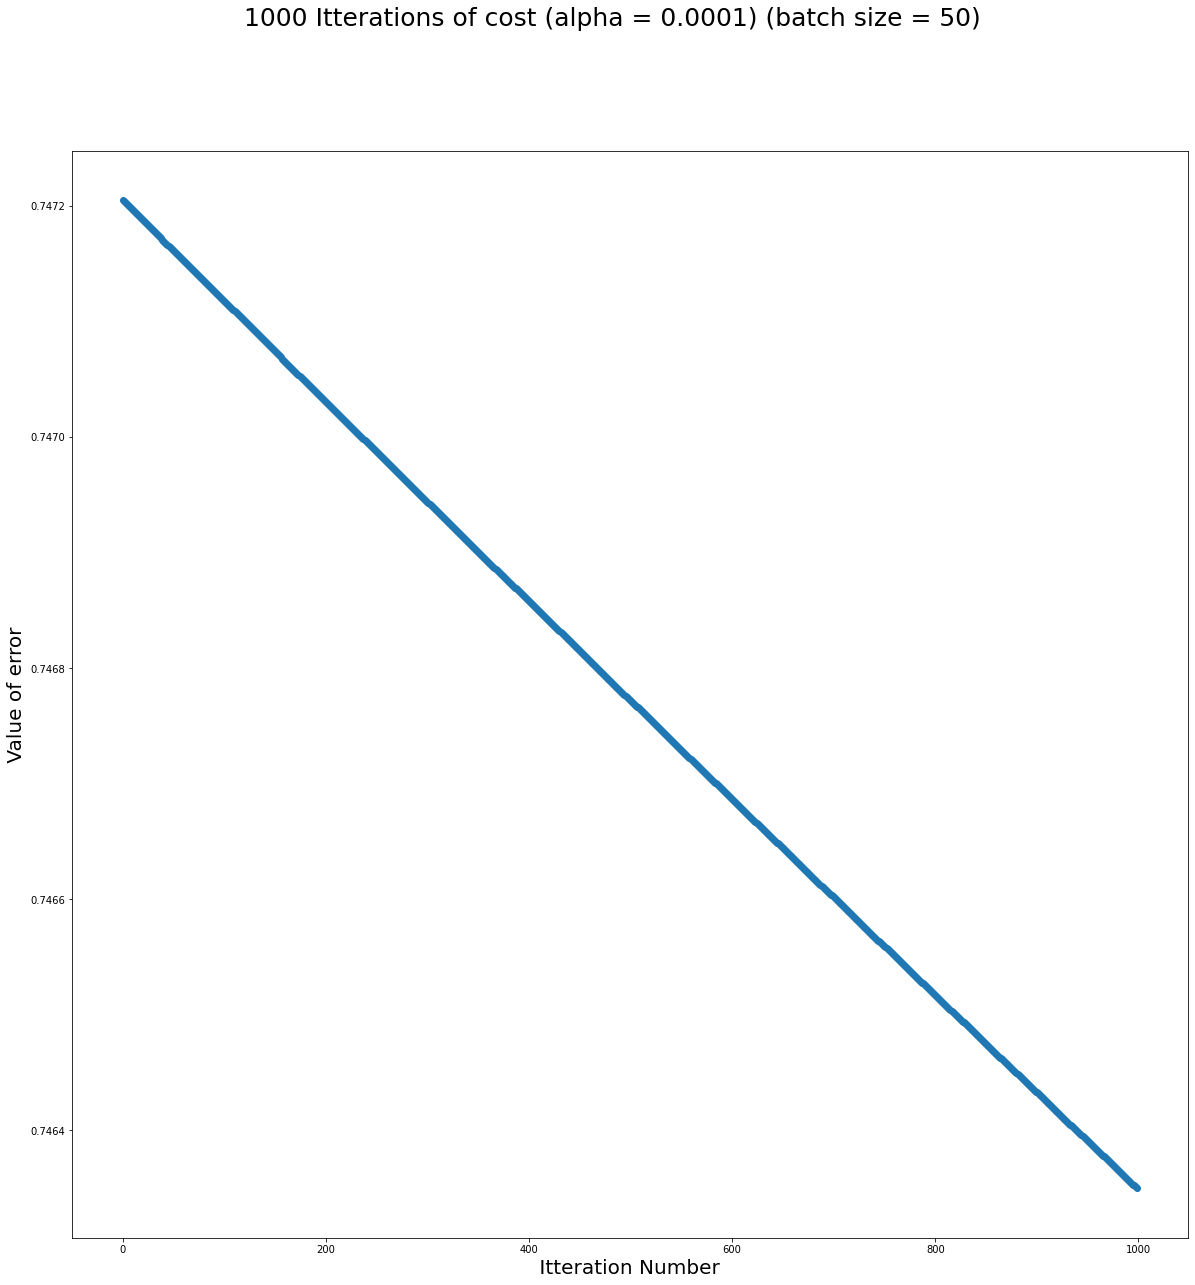

In [18]:
x_axis = [x for x in range(0,1000)]

fig8 = plt.figure(8, figsize=(20,20))
fig8.suptitle(" 1000 Itterations of cost (alpha = 0.0001) (batch size = 50) ", fontsize=25)
chart8 = fig8.add_subplot()
chart8.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.0001

counterw = 10000
counterb = 0

while (counterw > 0):
    while (counterb < 10):
        w0 = Wnew(1,y_batch[counterb],w0, alpha, counterb, 0)
        w1 = Wnew(x1_batch[counterb],y_batch[counterb],w1, alpha, counterb, 1)
        w2 = Wnew(x2_batch[counterb],y_batch[counterb],w2, alpha, counterb, 2)
        w3 = Wnew(x3_batch[counterb],y_batch[counterb],w3, alpha, counterb, 3)
        w4 = Wnew(x4_batch[counterb],y_batch[counterb],w4, alpha, counterb, 4)
        w5 = Wnew(x5_batch[counterb],y_batch[counterb],w5, alpha, counterb, 5)
        w6 = Wnew(x6_batch[counterb],y_batch[counterb],w6, alpha, counterb, 6)
        w7 = Wnew(x7_batch[counterb],y_batch[counterb],w7, alpha, counterb, 7)
        w8 = Wnew(x8_batch[counterb],y_batch[counterb],w8, alpha, counterb, 8)
        w9 = Wnew(x9_batch[counterb],y_batch[counterb],w9, alpha, counterb, 9)
        counterb += 1
    cost_arr.append(cost(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    if counterb == 10:
        counterb = 0
    counterw -= 1


print (len(cost_arr))

In [ ]:
x_axis = [x for x in range(0,10000)]

fig9 = plt.figure(9, figsize=(20,20))
fig9.suptitle(" 10000 Itterations of cost (alpha = 0.0001) (batch size = 50) ", fontsize=25)
chart9 = fig9.add_subplot()
chart9.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [10]:
cost_arr = []

alpha = 0.001

counterw = 500
counterb = 0

while (counterw > 0):
    while (counterb < 10):
        w0 = Wnew(1,y_batch[counterb],w0, alpha, counterb, 0)
        w1 = Wnew(x1_batch[counterb],y_batch[counterb],w1, alpha, counterb, 1)
        w2 = Wnew(x2_batch[counterb],y_batch[counterb],w2, alpha, counterb, 2)
        w3 = Wnew(x3_batch[counterb],y_batch[counterb],w3, alpha, counterb, 3)
        w4 = Wnew(x4_batch[counterb],y_batch[counterb],w4, alpha, counterb, 4)
        w5 = Wnew(x5_batch[counterb],y_batch[counterb],w5, alpha, counterb, 5)
        w6 = Wnew(x6_batch[counterb],y_batch[counterb],w6, alpha, counterb, 6)
        w7 = Wnew(x7_batch[counterb],y_batch[counterb],w7, alpha, counterb, 7)
        w8 = Wnew(x8_batch[counterb],y_batch[counterb],w8, alpha, counterb, 8)
        w9 = Wnew(x9_batch[counterb],y_batch[counterb],w9, alpha, counterb, 9)
        counterb += 1
    cost_arr.append(cost(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    if counterb == 10:
        counterb = 0
    counterw -= 1


print (len(cost_arr))

500


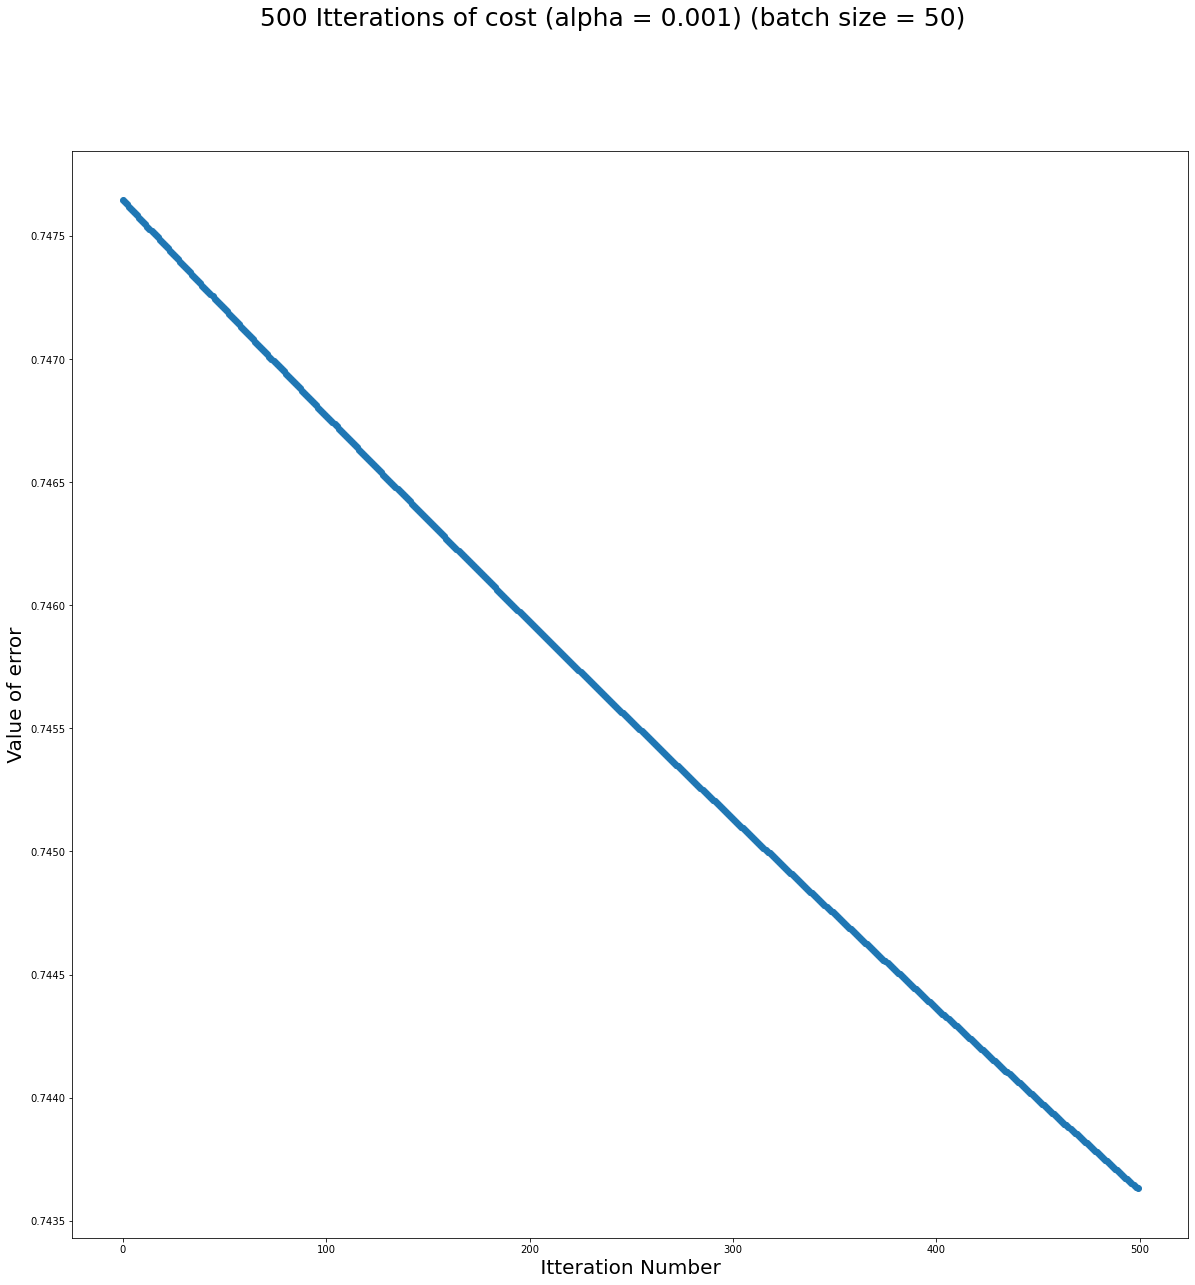

In [11]:
x_axis = [x for x in range(0,500)]

fig10 = plt.figure(10, figsize=(20,20))
fig10.suptitle(" 500 Itterations of cost (alpha = 0.001) (batch size = 50) ", fontsize=25)
chart10 = fig10.add_subplot()
chart10.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [12]:
cost_arr = []

alpha = 0.001

counterw = 1000
counterb = 0

while (counterw > 0):
    while (counterb < 10):
        w0 = Wnew(1,y_batch[counterb],w0, alpha, counterb, 0)
        w1 = Wnew(x1_batch[counterb],y_batch[counterb],w1, alpha, counterb, 1)
        w2 = Wnew(x2_batch[counterb],y_batch[counterb],w2, alpha, counterb, 2)
        w3 = Wnew(x3_batch[counterb],y_batch[counterb],w3, alpha, counterb, 3)
        w4 = Wnew(x4_batch[counterb],y_batch[counterb],w4, alpha, counterb, 4)
        w5 = Wnew(x5_batch[counterb],y_batch[counterb],w5, alpha, counterb, 5)
        w6 = Wnew(x6_batch[counterb],y_batch[counterb],w6, alpha, counterb, 6)
        w7 = Wnew(x7_batch[counterb],y_batch[counterb],w7, alpha, counterb, 7)
        w8 = Wnew(x8_batch[counterb],y_batch[counterb],w8, alpha, counterb, 8)
        w9 = Wnew(x9_batch[counterb],y_batch[counterb],w9, alpha, counterb, 9)
        counterb += 1
    cost_arr.append(cost(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    if counterb == 10:
        counterb = 0
    counterw -= 1


print (len(cost_arr))

1000


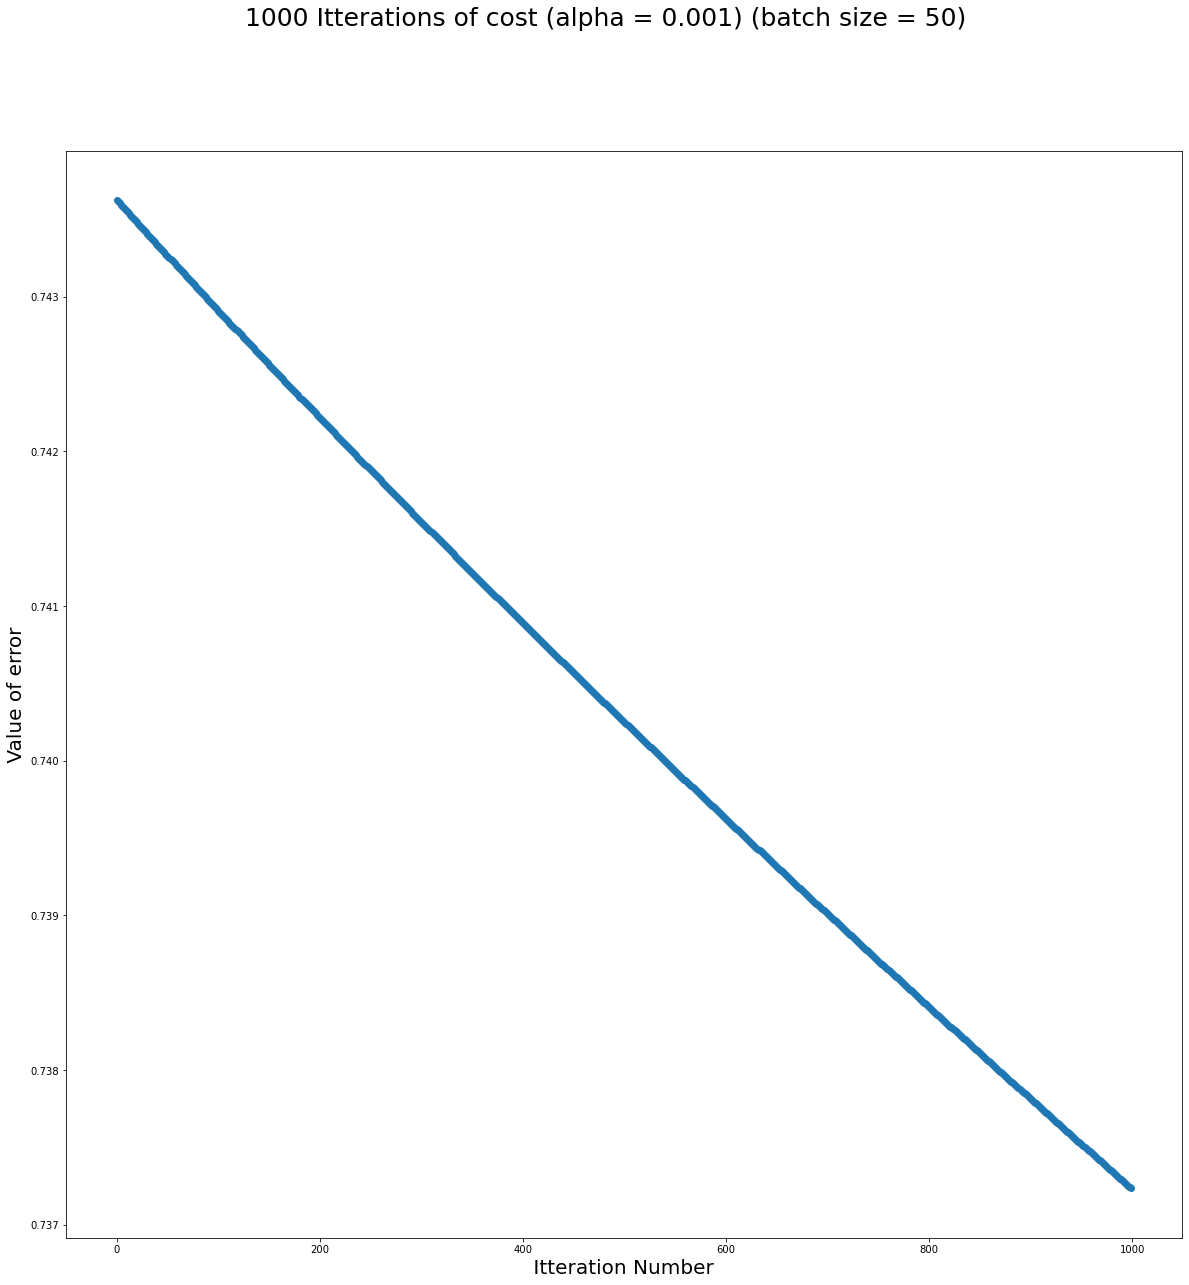

In [13]:
x_axis = [x for x in range(0,1000)]

fig11 = plt.figure(11, figsize=(20,20))
fig11.suptitle(" 1000 Itterations of cost (alpha = 0.001) (batch size = 50) ", fontsize=25)
chart11 = fig11.add_subplot()
chart11.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [ ]:
cost_arr = []

alpha = 0.001

counterw = 10000
counterb = 0

while (counterw > 0):
    while (counterb < 10):
        w0 = Wnew(1,y_batch[counterb],w0, alpha, counterb, 0)
        w1 = Wnew(x1_batch[counterb],y_batch[counterb],w1, alpha, counterb, 1)
        w2 = Wnew(x2_batch[counterb],y_batch[counterb],w2, alpha, counterb, 2)
        w3 = Wnew(x3_batch[counterb],y_batch[counterb],w3, alpha, counterb, 3)
        w4 = Wnew(x4_batch[counterb],y_batch[counterb],w4, alpha, counterb, 4)
        w5 = Wnew(x5_batch[counterb],y_batch[counterb],w5, alpha, counterb, 5)
        w6 = Wnew(x6_batch[counterb],y_batch[counterb],w6, alpha, counterb, 6)
        w7 = Wnew(x7_batch[counterb],y_batch[counterb],w7, alpha, counterb, 7)
        w8 = Wnew(x8_batch[counterb],y_batch[counterb],w8, alpha, counterb, 8)
        w9 = Wnew(x9_batch[counterb],y_batch[counterb],w9, alpha, counterb, 9)
        counterb += 1
    cost_arr.append(cost(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,y))
    if counterb == 10:
        counterb = 0
    counterw -= 1


print (len(cost_arr))

In [ ]:
x_axis = [x for x in range(0,10000)]

fig12 = plt.figure(12, figsize=(20,20))
fig12.suptitle(" 10000 Itterations of cost (alpha = 0.001) (batch size = 50) ", fontsize=25)
chart12 = fig12.add_subplot()
chart12.scatter(x_axis,cost_arr)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()